In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
# Load the dataset
# Assuming you have the IBM HR Analytics dataset
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Show first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Step 2: Exploratory Data Analysis (EDA)

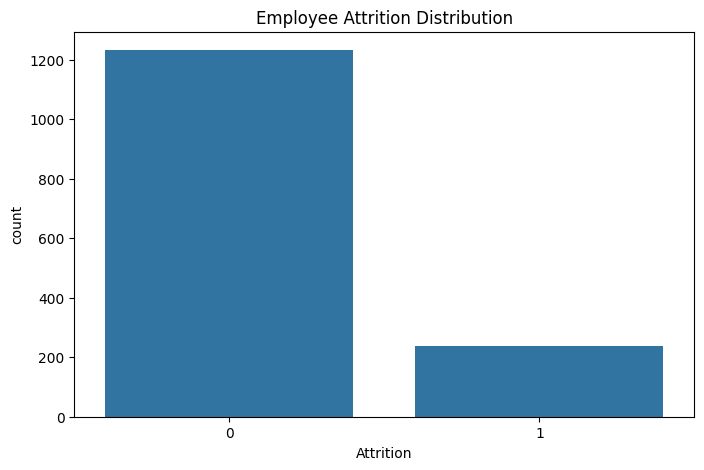

Non-numeric columns: Index(['Over18'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-nul

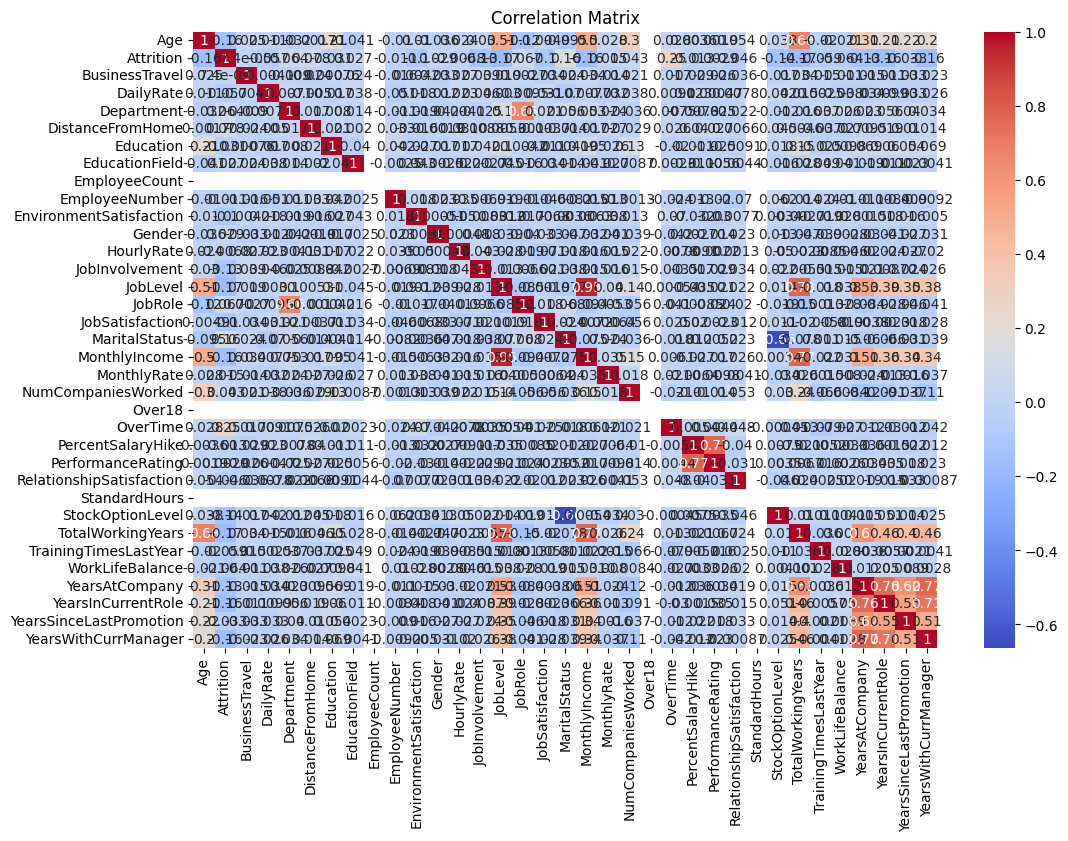

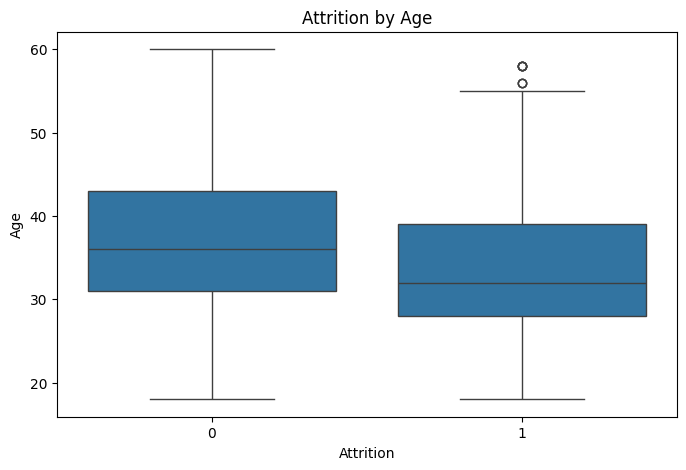

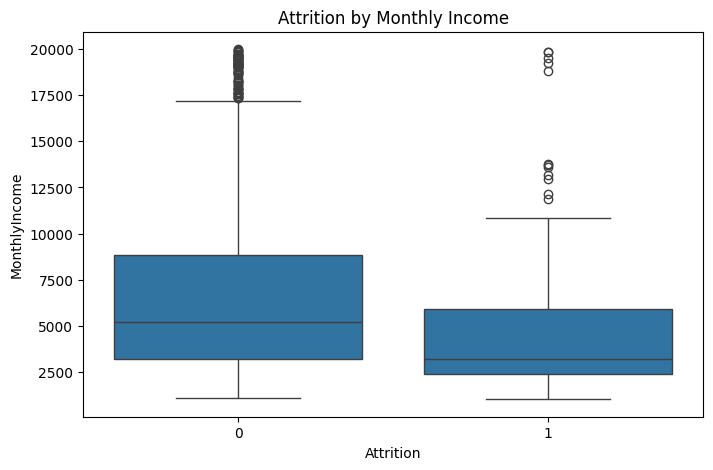

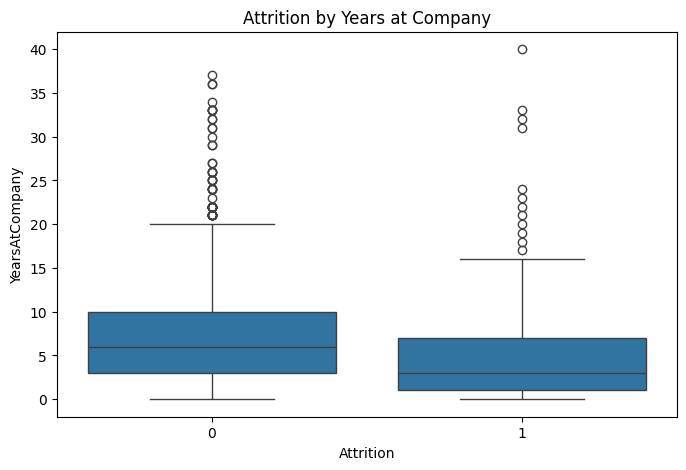

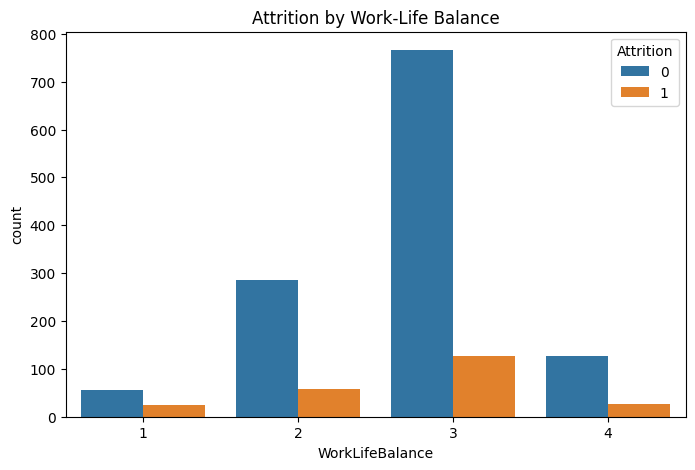

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Distribution")
plt.show()

# 2. Convert categorical columns to numeric using Label Encoding
non_numeric_cols = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_cols}")

# Apply Label Encoding to all non-numeric columns
le = LabelEncoder()
for col in non_numeric_cols:
    df[col] = le.fit_transform(df[col])

# Now check if all columns are numeric
print(df.info())  # All columns should now be numeric

# Calculate the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# 4. Visualize key relationships with Attrition
# Attrition by Age
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Attrition by Age")
plt.show()

# Attrition by Monthly Income
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Attrition by Monthly Income")
plt.show()

# Attrition by Years at Company
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title("Attrition by Years at Company")
plt.show()

# Attrition by Work-Life Balance
plt.figure(figsize=(8, 5))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title("Attrition by Work-Life Balance")
plt.show()

In [9]:
# 5. Prepare Data for Model Training
# Define feature variables (X) and target variable (y)
X = df.drop(columns=['Attrition', 'EmployeeNumber'])  # Drop 'Attrition' and irrelevant columns
y = df['Attrition']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Train a Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       380
           1       0.68      0.25      0.36        61

    accuracy                           0.88       441
   macro avg       0.79      0.61      0.65       441
weighted avg       0.86      0.88      0.85       441

Logistic Regression Accuracy:  0.8798185941043084


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


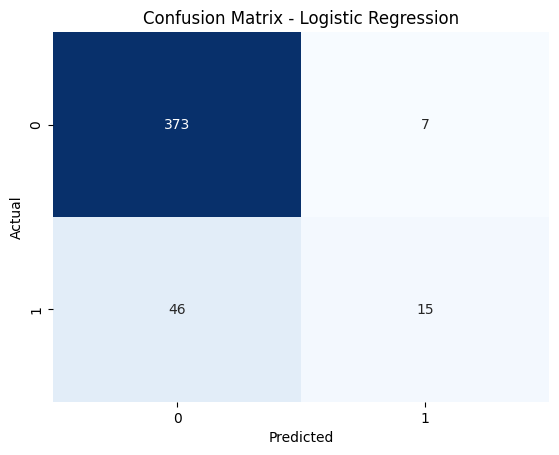

In [10]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.55      0.10      0.17        61

    accuracy                           0.86       441
   macro avg       0.71      0.54      0.55       441
weighted avg       0.83      0.86      0.82       441

Random Forest Accuracy:  0.8639455782312925


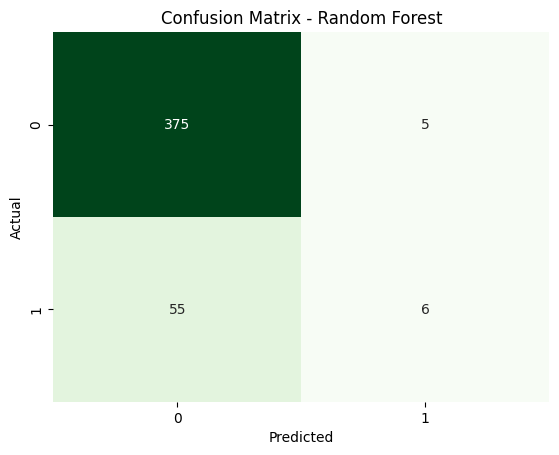

In [11]:
#7. Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()